Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。
Home Credit Default Risk | Kaggle
Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

##【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


1. Home Creditはどのような企業？
2. このコンペティションでは何を予測する？
3. それを予測することで企業が得られるメリットは何？

回答
1. Home Creditはグローバルな貸付プラットフォーム,
銀行口座を持たない人々のためのファイナンシャル・インクルージョン (貧困層に正規の金融取引ができるように改善する解決策を提供すること) 
2. 電話や取引情報を含むさまざまな代替データを利用しクライアントの返済能力を予測する
3. 返済能力のある顧客が無事借入できること、そして顧客がより確実に返済完了できるような借入額、完済日、返済スケジュールを提供すること

##【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。
* .head()、.info()、describe()などを使う
* 欠損値の有無を見る
* クラスごとのデータ数をグラフに出す
それぞれ結果に対する説明や考察も行ってください。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/iwaju/Desktop/Python/application_train.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [187]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


307511列122行

In [5]:
display(df.describe())
display(df.info())

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

In [6]:
df.isnull()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307507,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,True,True,True
307508,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
307509,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()/len(df["TARGET"])

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                                ...   
AMT_REQ_CREDIT_BUREAU_DAY     0.135016
AMT_REQ_CREDIT_BUREAU_WEEK    0.135016
AMT_REQ_CREDIT_BUREAU_MON     0.135016
AMT_REQ_CREDIT_BUREAU_QRT     0.135016
AMT_REQ_CREDIT_BUREAU_YEAR    0.135016
Length: 122, dtype: float64

In [77]:
df.isnull().sum()[df.isnull().sum()>0]

AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                96391
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_YEAR     41519
Length: 67, dtype: int64

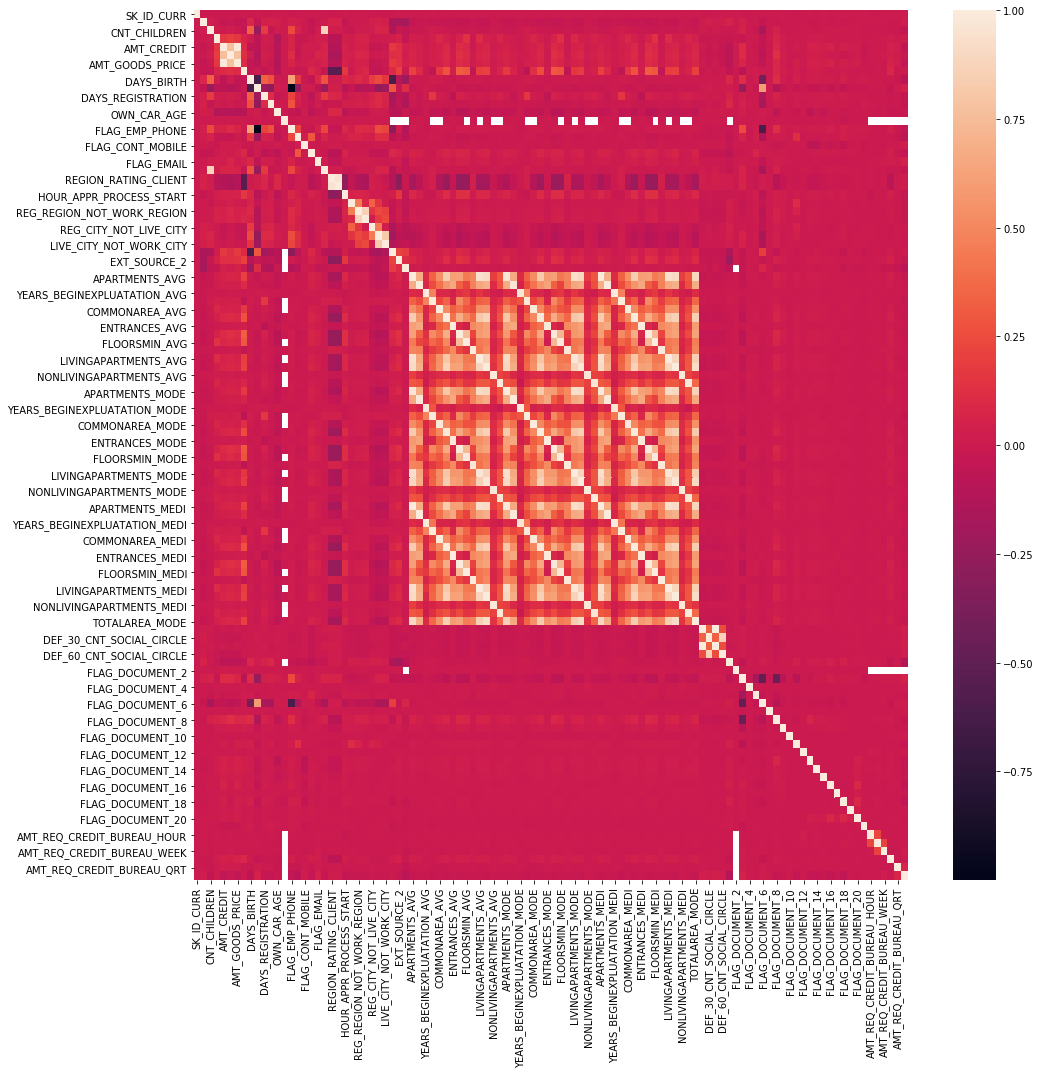

In [78]:
#相関係数行列のヒートマップ
fig = plt.figure(figsize=(16, 16))

sns.heatmap(df.corr())
plt.show()

In [79]:
df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,...,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
AMT_INCOME_TOTAL,-0.001820,-0.003982,0.012882,1.000000,0.156870,0.191657,0.159610,0.074796,0.027261,-0.064223,...,0.003130,0.002408,0.000242,-0.000589,0.000709,0.002944,0.002387,0.024700,0.004859,0.011690
AMT_CREDIT,-0.000343,-0.030369,0.002145,0.156870,1.000000,0.770138,0.986968,0.099738,-0.055436,-0.066838,...,0.034329,0.021082,0.031023,-0.016148,-0.003906,0.004238,-0.001275,0.054451,0.015925,-0.048448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,-0.002193,0.002704,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,0.002255,0.000472,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,-0.001336,0.003072,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,0.001372,-0.034457,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,-0.011799,0.015345,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


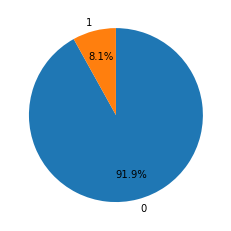

In [9]:
label=['0','1']
s_value = df["TARGET"].value_counts()

plt.pie(s_value,labels=label,counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)

plt.show()

1 = 支払が困難なクライアント
0 = それ以外

結果＆考察
まず、307511列122行と莫大な量のデータである。

支払い困難な人が8.1%ととても少ないなんでだ？

欠損値が多いので欠損値をばっさりと捨ててしまうか迷う
あえて欠損値にしているのかもしれない



##【問題3】課題設定

・目的変数と相関が高い説明変数は？

・男女どちらが多く借りているか、どちらがしっかりとお金を返しているか

・契約タイプの分布、目的変数との関係

・性別・契約タイプの分布、目的変数との関係

・収入差での返済能力差はあるのか？

・教育の分布

・子供の有無の分布、目的変数との関係


##【問題4】データ探索

問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。


探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
Name: TARGET, dtype: float64

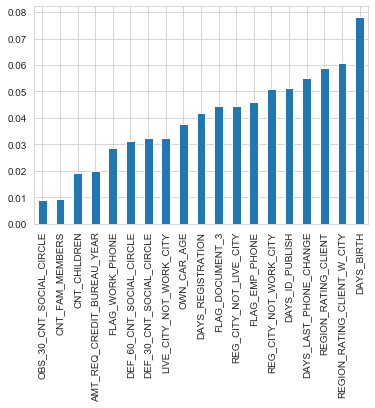

In [198]:
#目的変数と相関が高い説明変数を20個抽出
corr_df = df.corr()["TARGET"].sort_values()[-20:-1]
display(corr_df)
corr_df.plot.bar()

DAYS_BIRTHの0.078239が1番だが0.078239と、とても低い

In [80]:
#欠損値0
a = df.isnull().sum()
b = a[a==0]
df.loc[:, b.index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   NAME_INCOME_TYPE             307511 non-null  object 
 10  NAME_EDUCATION_TYPE          307511 non-null  object 
 11  NAME_FAMILY_STATUS           307511 non-null  object 
 12  NAME_HOUSING_TYPE            307511 non-null  object 
 13 

In [10]:
#男女の分布
df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

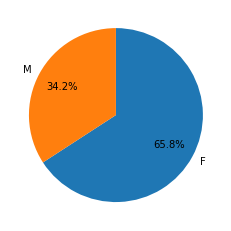

In [88]:
#　パーセント表示

df_cp = df.copy(deep=True)
sex = {"M":3,"F":5}
df_cp["CODE_GENDER"]=df["CODE_GENDER"].map(sex)


label=['F','M']
s_value = df_cp["CODE_GENDER"].value_counts()

plt.pie(s_value,labels=label,counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)

plt.show()

In [108]:
#object型から変換
#例外のXNAは除外

df_cp = df.copy(deep=True)
sex = {"F":3,"M":5}
df_cp["CODE_GENDER"]=df["CODE_GENDER"].map(sex)
df_cp["CODE_GENDER"][df["TARGET"]==0]
df_cp["CODE_GENDER"][df["TARGET"]==1]

0         5.0
26        3.0
40        5.0
42        3.0
81        3.0
         ... 
307448    5.0
307475    3.0
307481    5.0
307489    3.0
307509    3.0
Name: CODE_GENDER, Length: 24825, dtype: float64

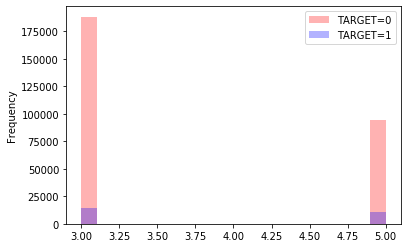

In [90]:
#男女でTARGETの割合
#　3 = F       5 = M

df_cp["CODE_GENDER"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="r" ,label="TARGET=0")
df_cp["CODE_GENDER"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3 ,color="b" ,label="TARGET=1")

plt.legend()
plt.show()

結論

女性の方がお金を借りている

男女とも1の割合が同じぐらい

年齢の分布はどうなんだろう？


In [131]:
#年齢の分布
df["DAYS_BIRTH"].value_counts()

-13749    43
-13481    42
-18248    41
-10020    41
-15771    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

年齢なのになんでマイナス？

年齢: クライアントが借入申請日の何日前に生まれたか

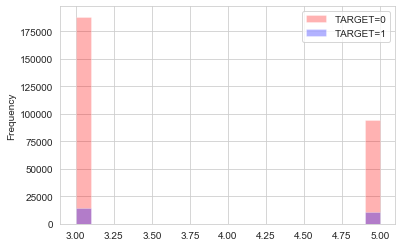

In [200]:
df_cp["CODE_GENDER"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="r" ,label="TARGET=0")
df_cp["CODE_GENDER"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3 ,color="b" ,label="TARGET=1")
plt.legend()

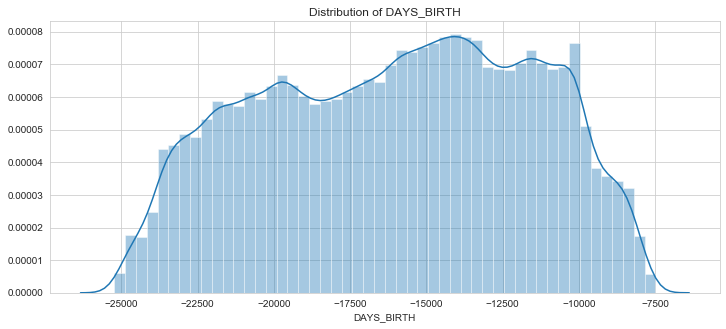

In [134]:

plt.figure(figsize=(12,5))
plt.title("DAYS_BIRTH")
ax = sns.distplot(df["DAYS_BIRTH"])

借りる人の年齢は41～35歳が多い

In [81]:
#契約タイプの分布　NAME_CONTRACT_TYPE

#カウント
df["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

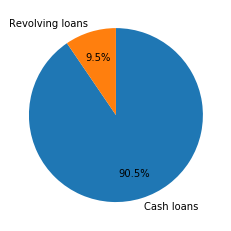

In [85]:
#　パーセント表示
label=['Cash loans','Revolving loans']
s_value = df["NAME_CONTRACT_TYPE"].value_counts()

plt.pie(s_value,labels=label,counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)

plt.show()

リボ払いが9.5パーセントとかなり少ない

In [106]:
#object 変換
df_cp2 = df.copy(deep=True)
pay = {"Cash loans":3,"Revolving loans":5}
df_cp2["NAME_CONTRACT_TYPE"]=df["NAME_CONTRACT_TYPE"].map(pay)
df_cp2["NAME_CONTRACT_TYPE"]

0         3
1         3
2         5
3         3
4         3
         ..
307506    3
307507    3
307508    3
307509    3
307510    3
Name: NAME_CONTRACT_TYPE, Length: 307511, dtype: int64

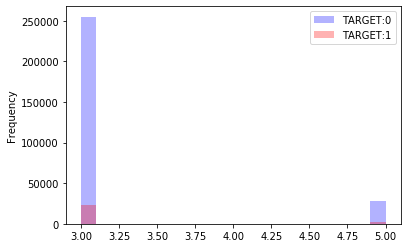

In [107]:
#目的変数との関係

df_cp2["NAME_CONTRACT_TYPE"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="b" ,label="TARGET:0")
df_cp2["NAME_CONTRACT_TYPE"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, color="r",label="TARGET:1")

plt.legend()
plt.show()

キャッシュで借りるのが主でリボ払いで借りることは少ない

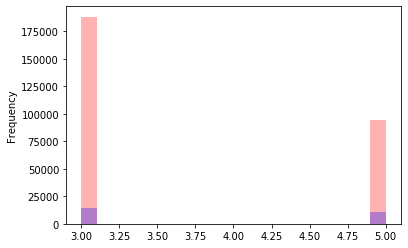

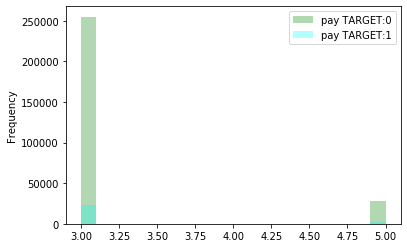

In [119]:
df_cp["CODE_GENDER"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="r" ,label="sex TARGET:0")
df_cp["CODE_GENDER"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3 ,color="b" ,label="sex TARGET:1")
plt.figure()
df_cp2["NAME_CONTRACT_TYPE"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="g" ,label="pay TARGET:0")
df_cp2["NAME_CONTRACT_TYPE"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, color="cyan",label="pay TARGET:1")

plt.legend()
plt.show()

収入差での返済能力差はあるのか？

In [135]:
df["AMT_INCOME_TOTAL"].value_counts()

135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64

C:\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:59: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  n, bins, patches = ax.hist(y, bins=bins, bottom=bottom, **kwds)


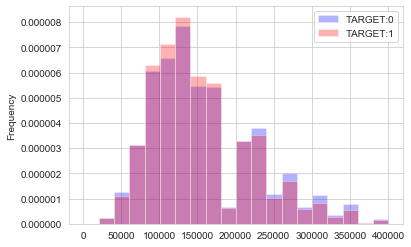

In [140]:
df["AMT_INCOME_TOTAL"][df["TARGET"]==0].plot.hist(bins=20, alpha = 0.3 ,color="b",label="TARGET:0" ,normed=True,range=(1000,400000))
df["AMT_INCOME_TOTAL"][df["TARGET"]==1].plot.hist(bins=20, alpha = 0.3, color="r",label="TARGET:1",normed=True,range=(1000,400000))
plt.legend()
plt.show()

返済能力(0,1)での差が少ない

収入と返済能力には相関がないのでは？

教育と目的変数との関係
TARGET 0と1では学歴の差があるのでは？

In [141]:
#教育の分布
df["NAME_EDUCATION_TYPE"].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

中等教育が主である

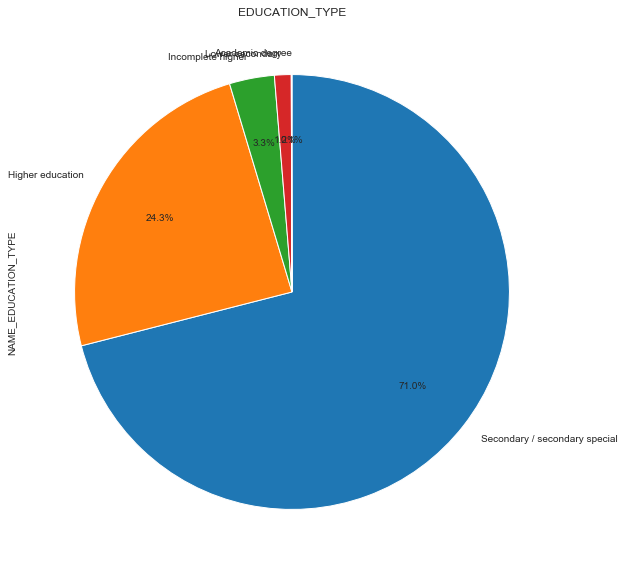

In [171]:
display(df["NAME_EDUCATION_TYPE"].value_counts().plot.pie(title="EDUCATION_TYPE",counterclock=False, startangle=90,
                                                           autopct='%1.1f%%', pctdistance=0.7,figsize=(12,10)))

In [183]:
df_TARGET_1 = df[df["TARGET"] == 1]
df_TARGET_0 = df[df["TARGET"] == 0]
edu1 = df_TARGET_1["NAME_EDUCATION_TYPE"].value_counts()
edu0 = df_TARGET_0["NAME_EDUCATION_TYPE"].value_counts()
display(edu1, edu0)
display(edu1.sum(), edu0.sum())

Secondary / secondary special    19524
Higher education                  4009
Incomplete higher                  872
Lower secondary                    417
Academic degree                      3
Name: NAME_EDUCATION_TYPE, dtype: int64

Secondary / secondary special    198867
Higher education                  70854
Incomplete higher                  9405
Lower secondary                    3399
Academic degree                     161
Name: NAME_EDUCATION_TYPE, dtype: int64

24825

282686

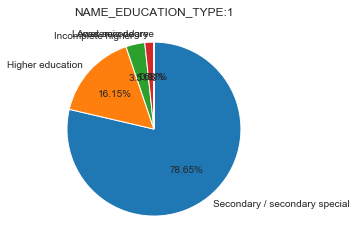

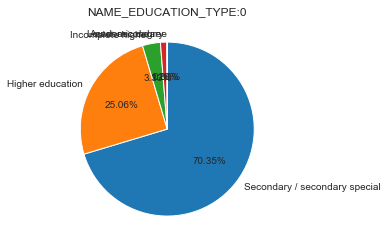

In [179]:
fig, ax1 = plt.subplots()
plt.title("NAME_EDUCATION_TYPE:1")
ax1.pie(edu1, labels=gen_1.index.values, startangle=90, counterclock=False, autopct="%1.2f%%")

fig, ax2 = plt.subplots()
plt.title("NAME_EDUCATION_TYPE:0")
ax2.pie(edu0, labels=gen_0.index.values, startangle=90, counterclock=False, autopct="%1.2f%%")

plt.show()

0と1ではHigher educationとSecondary / secondary specialに差がある

子供の有無の分布、目的変数との関係

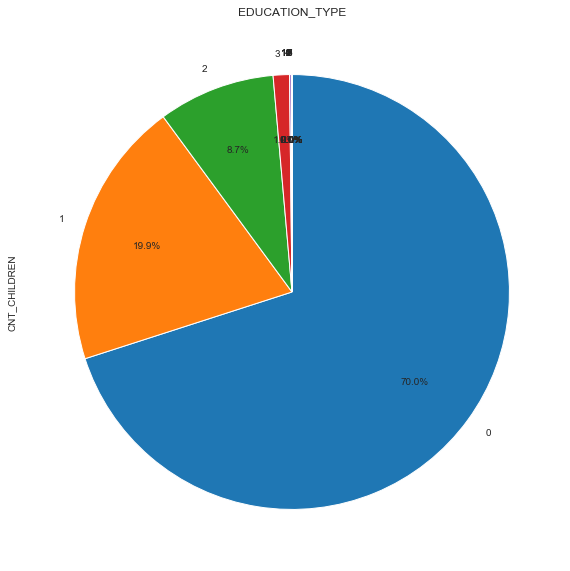

In [190]:
display(df["CNT_CHILDREN"].value_counts().plot.pie(title="EDUCATION_TYPE",counterclock=False, startangle=90,
                                                           autopct='%1.1f%%', pctdistance=0.7,figsize=(12,10)))

In [188]:
df["CNT_CHILDREN"].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

子供は0人が7割を占める

In [192]:
df_TARGET_1 = df[df["TARGET"] == 1]
df_TARGET_0 = df[df["TARGET"] == 0]
chi1 = df_TARGET_1["CNT_CHILDREN"].value_counts()
chi0 = df_TARGET_0["CNT_CHILDREN"].value_counts()
display(chi1, chi0)
display(chi1.sum(), chi0.sum())

0     16609
1      5454
2      2333
3       358
4        55
5         7
6         6
9         2
11        1
Name: CNT_CHILDREN, dtype: int64

0     198762
1      55665
2      24416
3       3359
4        374
5         77
6         15
7          7
14         3
19         2
12         2
10         2
8          2
Name: CNT_CHILDREN, dtype: int64

24825

282686

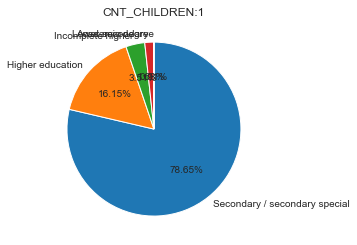

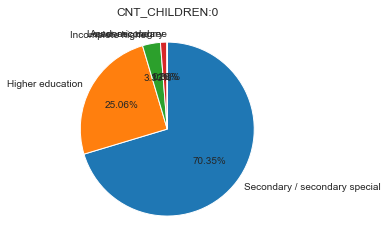

In [193]:
fig, ax1 = plt.subplots()
plt.title("CNT_CHILDREN:1")
ax1.pie(edu1, labels=gen_1.index.values, startangle=90, counterclock=False, autopct="%1.2f%%")

fig, ax2 = plt.subplots()
plt.title("CNT_CHILDREN:0")
ax2.pie(edu0, labels=gen_0.index.values, startangle=90, counterclock=False, autopct="%1.2f%%")

plt.show()